# 6: Classification

The hand-in exercise for this topic is Exercise 2 from the notebook “Exercises in
Classification II.ipynb”

---

### Exercise 2 from the notebook “Exercises in Classification II.ipynb”

1. Clean the income variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict income. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable income based on the feature variables selected in 2 - try out some different Ks
5. Train a logistic regression classifier to predict the variable income based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

---

### Assemble + Installs + Imports

In [1]:
# Only for while working in google colab, can be removed again using jupyter
#from google.colab import files
#uploaded = files.upload()

In [2]:
# Lib imports for the notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# The different classifiers:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# read the csv
df = pd.read_csv("adult.csv")

---

### Initial EDA and datacleaning

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


---

### 1. Clean the income variable such that it has only two values

In [7]:
# To do this lets first see how many different values income currently holds
df['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

There seem to be a encoding error, we will merge the value ending with a dot to the actual ones, so no data is lost.

In [8]:
# Lets merge the the values into only 2 categories by trimming dots in the column entries
df["income"] = df["income"].str.replace(".", "")
# Lets see if it worked
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

---

### 2. Select as set of minimum two feature variables you want to use to predict income. Do the necessary transformation of these variables.

Im going to select two numerical features to predict income
- 'education-num': Motivated by the assumption that higher education rewards higher paying jobs
- 'age': Motivated by the assumption that older people have more work experience and therefor are qualified for higher paying jobs

Since aducation num and age ranges in very diffent numbers, we are going to scale the features so they are ready for modelling or comparison

In [9]:
# My chosen features
income_features = ["age", "education-num"]
# Init a MinMaxScaler
scaler = MinMaxScaler()
# Apply the scaler
df[income_features] = scaler.fit_transform(df[income_features])
# Asses result
print(df[income_features].head())

        age  education-num
0  0.301370       0.800000
1  0.452055       0.800000
2  0.287671       0.533333
3  0.493151       0.400000
4  0.150685       0.800000


This is done to prevent the chance of one variable weighting higher than another when training a model using these features

---

### 3. Create X and y dataset and split the datasets into training and testing sets

This can easily be accomplished using sklearn train_test_split library

In [10]:
# Chose my features (x) and my target (y)
X = df[["age", "education-num"]]
y = df["income"].map({">50K": 1, "<=50K": 0}) # Map to binary
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

### 4. Train a KNN classifier to predict the variable income based on the feature variables selected in 2 - try out some different Ks

Create a graph to visualize the best posibileties for a good K

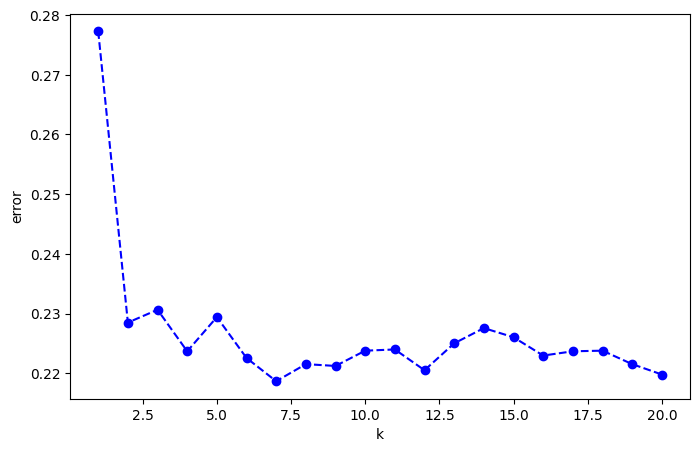

In [11]:
# empty list to store the errors in so we can plot them afterwards
errors = []

# For loop to try k ranging from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) # predict each k in the loop to find the best contender
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), errors, marker='o', linestyle='dashed', color='blue')
plt.xlabel("k")
plt.ylabel("error")
plt.show()

Now lets train the KNN classifier

In [12]:
# using the optimal k found in the visualization above
k = 18
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)
# Predict!
y_pred = knn_classifier.predict(X_test)
# Evaæuation metrics:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(accuracy))

Accuracy: 0.776230934589006


It would seem the accuracy is the same as we read it on the elbowmethod plot

---

### 5. Train a logistic regression classifier to predict the variable income based on the feature variables selected in 2 and compare it to the KNN classifier.

In [13]:
# Init a log reg model and fir the data from my train/test split
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# Predict!
log_reg_y_pred = log_reg.predict(X_test)
# Evaluation
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print("Logistic Regression Accuracy: " + str(log_reg_accuracy))

Logistic Regression Accuracy: 0.7801207902548879


Lets compare KNN vs Logistic Regression:

In [14]:
# The Score:
print("KNN Accuracy: " + str(accuracy))
print("Logistic Regression Accuracy: " + str(log_reg_accuracy))
# Case statement to print the winner
if log_reg_accuracy > accuracy:
    print("Logistic Regression WINS!!!")
elif log_reg_accuracy < accuracy:
    print("KNN (K=" + str(k) + ") WINS!!!")
else:
    print("Both models have the same accuracy score")

KNN Accuracy: 0.776230934589006
Logistic Regression Accuracy: 0.7801207902548879
Logistic Regression WINS!!!


---

6. Train a decision tree classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [15]:
# Init a decision tree classifier
tree_classi = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_classi.fit(X_train, y_train)
# predict
y_pred_tree = tree_classi.predict(X_test)
# Evaluation
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy: " + str(tree_accuracy))

Decision Tree Accuracy: 0.7904596171563107


Lets compare the 3 contenders now:

In [16]:
print("Contenders:")
print("KNN Accuracy: " + str(accuracy))
print("Logistic Regression Accuracy: " + str(log_reg_accuracy))
print("Decision Tree Accuracy: " + str(tree_accuracy))
# Choose the best performing model and print it
print("Highest acc:")
if accuracy > max(log_reg_accuracy, tree_accuracy):
     print("KNN (K=" + str(k) + ") WINS!!!")
elif log_reg_accuracy > max(accuracy, tree_accuracy):
    print("Logistic Regression WINS!!!")
elif tree_accuracy > max(accuracy, log_reg_accuracy):
    print("Decesion Tree Classifier WINS!!!")
else:
    print("All models have the same accuracy score")

Contenders:
KNN Accuracy: 0.776230934589006
Logistic Regression Accuracy: 0.7801207902548879
Decision Tree Accuracy: 0.7904596171563107
Highest acc:
Decesion Tree Classifier WINS!!!


---

### 7. Train a random forest classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [17]:
# Init a random forest classifier
rf_classi = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)  # Adjust depth if needed
rf_classi.fit(X_train, y_train)
# Preedict
y_pred_rf = rf_classi.predict(X_test)
# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)

Lets compare the now 4 contenders

In [18]:
# Lets compare again
print("Contenders:")
print("KNN Accuracy: " + str(accuracy))
print("Logistic Regression Accuracy: " + str(log_reg_accuracy))
print("Decision Tree Accuracy: " + str(tree_accuracy))
print("Random Forest Accuracy: " + str(rf_accuracy))
# Choose the best performing model and print it
print("Highest acc:")
if accuracy > max(log_reg_accuracy, tree_accuracy, rf_accuracy):
     print("KNN (K=" + str(k) + ") WINS!!!")
elif log_reg_accuracy > max(accuracy, tree_accuracy, rf_accuracy):
    print("Logistic Regression WINS!!!")
elif tree_accuracy > max(accuracy, log_reg_accuracy, rf_accuracy):
    print("Decision Tree Classifier WINS!!!")
elif rf_accuracy > max(accuracy, log_reg_accuracy, tree_accuracy):
    print("Random Forest Classifier WINS!!!")
else:
    print("All models have the same accuracy score")

Contenders:
KNN Accuracy: 0.776230934589006
Logistic Regression Accuracy: 0.7801207902548879
Decision Tree Accuracy: 0.7904596171563107
Random Forest Accuracy: 0.7923021803664654
Highest acc:
Random Forest Classifier WINS!!!


---

8. Train a AdaBoost classifier to predict the variable income based on the feature variables selected in 2 and compare it to the previous classifiers.

In [19]:
# Init AdaBoost classifier
ada_classi = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classi.fit(X_train, y_train)
# Predict
y_pred_ada = ada_classi.predict(X_test)
# Evaluate
ada_accuracy = accuracy_score(y_test, y_pred_ada)

Lets compare the now 5 classifiers, to find the best performing for this scenario of Education + Age vs Income scenario

In [20]:
# Lets compare again
print("Contenders:")
print("KNN Accuracy: " + str(accuracy))  # Ensure 'accuracy' is your KNN accuracy variable
print("Logistic Regression Accuracy: " + str(log_reg_accuracy))
print("Decision Tree Accuracy: " + str(tree_accuracy))
print("Random Forest Accuracy: " + str(rf_accuracy))
print("AdaBoost Accuracy: " + str(ada_accuracy))
# Choose the best performing model and print it
print("Highest acc:")
if accuracy > max(log_reg_accuracy, tree_accuracy, rf_accuracy, ada_accuracy):
     print("KNN (K=" + str(k) + ") WINS!!!")
elif log_reg_accuracy > max(accuracy, tree_accuracy, rf_accuracy, ada_accuracy):
    print("Logistic Regression WINS!!!")
elif tree_accuracy > max(accuracy, log_reg_accuracy, rf_accuracy, ada_accuracy):
    print("Decision Tree Classifier WINS!!!")
elif rf_accuracy > max(accuracy, log_reg_accuracy, tree_accuracy, ada_accuracy):
    print("Random Forest Classifier WINS!!!")
elif ada_accuracy > max(accuracy, log_reg_accuracy, tree_accuracy, rf_accuracy):
    print("AdaBoost Classifier WINS!!!")
else:
    print("All models have the same accuracy score")

Contenders:
KNN Accuracy: 0.776230934589006
Logistic Regression Accuracy: 0.7801207902548879
Decision Tree Accuracy: 0.7904596171563107
Random Forest Accuracy: 0.7923021803664654
AdaBoost Accuracy: 0.7888217831917289
Highest acc:
Random Forest Classifier WINS!!!


---

### Take aways

Setting up a classification pipeline like thise can help choosing the most optimal classifier for a given task. Simply run the pipeline and compare the results, choose the best performer for the task at hand.